# Agentic AI Payments with X402 & AP2 Protocols

## Demonstrating Machine-to-Machine Commerce Infrastructure

**Date**: September 2025  
Technical demonstration of autonomous payment protocols for AI agents

---

This notebook explores the technical implementation of **Coinbase's X402** and **Google's Agent Payments Protocol (AP2)**, which enable AI agents to autonomously handle payments and resource access.

### Key Concepts Covered:
1. **HTTP 402 "Payment Required" Protocol**
2. **Agentic Payment Flow Implementation**
3. **Stablecoin Rails for Machine Commerce**
4. **Real-world Use Cases & Architecture**

### References:
- [X402 Specification](https://github.com/coinbase/x402/blob/main/specs/x402-specification.md)
- [X402 Whitepaper](https://www.x402.org/x402-whitepaper.pdf)
- [Google AP2 Announcement](https://cloud.google.com/blog/products/ai-machine-learning/announcing-agents-to-payments-ap2-protocol)
- [Coinbase Developer Platform](https://www.coinbase.com/developer-platform/discover/launches/google_x402)

In [1]:
# Install required dependencies
!pip install requests web3 python-dotenv pandas matplotlib

import requests
import json
import time
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict, Optional, Any
import hashlib
import uuid

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.5/587.5 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.9/332.9 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.4/171.4 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 58.0 MB/s eta 0:00:00


## 1. Understanding HTTP 402 Protocol

The **HTTP 402 "Payment Required"** status code, long dormant in web standards, is being revived by X402 to enable seamless payment integration into web requests.

### How it works:
1. Client requests a protected resource
2. Server responds with `402 Payment Required` + payment details
3. Client processes payment automatically
4. Client retries request with payment proof
5. Server grants access

**Key Innovation**: This enables AI agents to autonomously handle payment negotiations without human intervention.

In [2]:
class AgenticHTTPClient:
    """HTTP client that can autonomously handle 402 Payment Required responses"""

    def __init__(self, wallet_address: str = None, payment_handler=None):
        self.wallet_address = wallet_address or "0x" + "1" * 40  # Mock wallet
        self.payment_handler = payment_handler or self._mock_payment_handler
        self.session = requests.Session()
        self.payment_history = []

    def _mock_payment_handler(self, invoice: str, amount: float, recipient: str) -> str:
        """Mock payment processor - in production, this would integrate with Web3/stablecoin APIs"""
        tx_hash = hashlib.sha256(f"{invoice}{amount}{recipient}{time.time()}".encode()).hexdigest()[:16]

        # Simulate payment delay
        time.sleep(0.1)

        # Record payment
        payment_record = {
            'timestamp': datetime.now().isoformat(),
            'invoice': invoice,
            'amount': amount,
            'recipient': recipient,
            'tx_hash': tx_hash,
            'status': 'confirmed'
        }
        self.payment_history.append(payment_record)

        print(f"💳 Payment processed: {amount} USDC to {recipient[:10]}... | Tx: {tx_hash}")
        return tx_hash

    def get_with_payment(self, url: str, headers: Dict = None) -> requests.Response:
        """GET request with automatic 402 payment handling"""
        headers = headers or {}

        print(f"🌐 Requesting: {url}")
        response = self.session.get(url, headers=headers)

        # Handle 402 Payment Required
        if response.status_code == 402:
            print("💰 Payment required - processing automatically...")

            # Extract payment details from headers (X402 spec)
            invoice_id = response.headers.get('X-Payment-Invoice', str(uuid.uuid4()))
            amount = float(response.headers.get('X-Payment-Amount', '0.001'))  # Default 0.001 USDC
            recipient = response.headers.get('X-Payment-Recipient', 'merchant_wallet')
            payment_pointer = response.headers.get('X-Payment-Pointer', f"{recipient}/payments")

            print(f"   Invoice: {invoice_id}")
            print(f"   Amount: {amount} USDC")
            print(f"   Recipient: {recipient}")

            # Process payment
            tx_hash = self.payment_handler(invoice_id, amount, recipient)

            # Retry request with payment proof
            payment_headers = headers.copy()
            payment_headers.update({
                'X-Payment-Proof': tx_hash,
                'X-Payment-Invoice': invoice_id,
                'X-Payer-Address': self.wallet_address
            })

            print("🔄 Retrying request with payment proof...")
            response = self.session.get(url, headers=payment_headers)

        print(f"✅ Response: {response.status_code} {response.reason}")
        return response

    def get_payment_summary(self) -> pd.DataFrame:
        """Return payment history as DataFrame"""
        return pd.DataFrame(self.payment_history) if self.payment_history else pd.DataFrame()

# Initialize our agentic client
agent_client = AgenticHTTPClient(wallet_address="0xAgent123...")
print("🤖 Agentic HTTP Client initialized")

🤖 Agentic HTTP Client initialized


## 2. Simulating X402 Payment Flow

Let's simulate how an AI agent would interact with payment-gated resources using the X402 protocol.

**Scenario**: An AI agent needs to access premium data APIs, computational resources, or specialized AI models that require micropayments.

In [3]:
class MockPaymentGatedServer:
    """Simulates a server implementing X402 payment protocol"""

    def __init__(self):
        self.paid_invoices = set()
        self.resources = {
            '/premium-data': {'price': 0.001, 'content': {'market_data': [1.23, 4.56, 7.89]}},
            '/ai-model-inference': {'price': 0.005, 'content': {'prediction': 0.87, 'confidence': 0.92}},
            '/compute-intensive-task': {'price': 0.01, 'content': {'result': 'Task completed', 'duration': '45s'}}
        }

    def handle_request(self, path: str, headers: Dict = None) -> Dict[str, Any]:
        """Simulate server response with 402 or 200 based on payment status"""
        headers = headers or {}

        if path not in self.resources:
            return {'status': 404, 'body': 'Resource not found'}

        resource = self.resources[path]
        payment_proof = headers.get('X-Payment-Proof')
        invoice_id = headers.get('X-Payment-Invoice')

        # Check if payment was provided
        if payment_proof and invoice_id in self.paid_invoices:
            return {
                'status': 200,
                'body': resource['content'],
                'headers': {'Content-Type': 'application/json'}
            }

        # Require payment
        invoice_id = f"INV-{uuid.uuid4().hex[:8]}"
        self.paid_invoices.add(invoice_id)  # Auto-approve for demo

        return {
            'status': 402,
            'body': 'Payment Required',
            'headers': {
                'X-Payment-Invoice': invoice_id,
                'X-Payment-Amount': str(resource['price']),
                'X-Payment-Recipient': '0xMerchant456...',
                'X-Payment-Currency': 'USDC',
                'X-Payment-Network': 'base'
            }
        }

# Test the payment flow
mock_server = MockPaymentGatedServer()
print("🖥️  Mock X402 server initialized")
print("\n" + "="*60)
print("DEMO: AI Agent Accessing Payment-Gated Resources")
print("="*60)

🖥️  Mock X402 server initialized

DEMO: AI Agent Accessing Payment-Gated Resources


In [4]:
# Simulate agent requesting multiple paid resources
test_resources = [
    '/premium-data',
    '/ai-model-inference',
    '/compute-intensive-task'
]

results = []

for resource in test_resources:
    print(f"\n🎯 Agent requesting: {resource}")

    # First request (will get 402)
    response1 = mock_server.handle_request(resource)
    print(f"   Status: {response1['status']} - {response1['body']}")

    if response1['status'] == 402:
        # Extract payment info
        invoice = response1['headers']['X-Payment-Invoice']
        amount = float(response1['headers']['X-Payment-Amount'])
        recipient = response1['headers']['X-Payment-Recipient']

        print(f"   💳 Processing payment: {amount} USDC")

        # Agent processes payment
        tx_hash = agent_client.payment_handler(invoice, amount, recipient)

        # Retry with payment proof
        payment_headers = {
            'X-Payment-Proof': tx_hash,
            'X-Payment-Invoice': invoice,
            'X-Payer-Address': agent_client.wallet_address
        }

        response2 = mock_server.handle_request(resource, payment_headers)
        print(f"   ✅ Final Status: {response2['status']}")
        print(f"   📦 Data received: {response2['body']}")

        results.append({
            'resource': resource,
            'amount_paid': amount,
            'tx_hash': tx_hash,
            'data_received': response2['body']
        })

print(f"\n🎉 Agent successfully completed {len(results)} paid transactions!")


🎯 Agent requesting: /premium-data
   Status: 402 - Payment Required
   💳 Processing payment: 0.001 USDC
💳 Payment processed: 0.001 USDC to 0xMerchant... | Tx: 6af4aa8aad17ac1b
   ✅ Final Status: 200
   📦 Data received: {'market_data': [1.23, 4.56, 7.89]}

🎯 Agent requesting: /ai-model-inference
   Status: 402 - Payment Required
   💳 Processing payment: 0.005 USDC
💳 Payment processed: 0.005 USDC to 0xMerchant... | Tx: 7a11b6c705c55354
   ✅ Final Status: 200
   📦 Data received: {'prediction': 0.87, 'confidence': 0.92}

🎯 Agent requesting: /compute-intensive-task
   Status: 402 - Payment Required
   💳 Processing payment: 0.01 USDC
💳 Payment processed: 0.01 USDC to 0xMerchant... | Tx: 3cffd29e90615dae
   ✅ Final Status: 200
   📦 Data received: {'result': 'Task completed', 'duration': '45s'}

🎉 Agent successfully completed 3 paid transactions!


## 3. Web3 & Stablecoin Integration

**Why blockchain matters for agentic payments:**
- **Permissionless**: AI agents can create wallets without human KYC
- **Programmable**: Smart contracts can automate complex payment logic
- **Global**: No banking restrictions or currency conversion
- **Instant Settlement**: Transactions confirm in seconds, not days
- **Micropayments**: Viable for $0.001+ transactions due to low fees

### Stablecoin Rails (USDC on Base)
Base (Coinbase's L2) offers:
- ~$0.001 transaction fees
- 2-second block times
- Native USDC support

In [5]:
from web3 import Web3
import json

class AgenticWallet:
    """Simplified Web3 wallet for AI agents (demo purposes)"""

    def __init__(self, rpc_url: str = None):
        # Mock RPC for demo (use real Base RPC in production)
        self.rpc_url = rpc_url or "https://base-mainnet.g.alchemy.com/v2/demo"
        self.w3 = None  # Would initialize Web3(Web3.HTTPProvider(rpc_url)) in production

        # Generate deterministic demo wallet
        self.address = "0x" + hashlib.sha256("demo_agent".encode()).hexdigest()[:40]
        self.balance_usdc = 100.0  # Mock balance

    def send_usdc(self, to_address: str, amount: float, memo: str = "") -> str:
        """Send USDC payment (mocked for demo)"""
        if amount > self.balance_usdc:
            raise ValueError(f"Insufficient balance: {self.balance_usdc} USDC")

        # Simulate transaction
        tx_hash = "0x" + hashlib.sha256(
            f"{self.address}{to_address}{amount}{time.time()}".encode()
        ).hexdigest()

        # Update balance
        self.balance_usdc -= amount

        print(f"🪙 USDC Transfer: {amount} USDC")
        print(f"   From: {self.address}")
        print(f"   To: {to_address}")
        print(f"   Tx: {tx_hash[:16]}...")
        print(f"   New Balance: {self.balance_usdc} USDC")

        return tx_hash

    def get_balance(self) -> Dict[str, float]:
        return {
            'address': self.address,
            'usdc_balance': self.balance_usdc,
            'eth_balance': 0.01  # For gas
        }

# Initialize agent wallet
agent_wallet = AgenticWallet()
print("💰 Agent Wallet Initialized")
print(f"   Address: {agent_wallet.address}")
print(f"   Balance: {agent_wallet.balance_usdc} USDC")

💰 Agent Wallet Initialized
   Address: 0x20b5f127ba09de07044212890e533d6fc3ce7d55
   Balance: 100.0 USDC


## 4. Real-World Use Cases & Architecture

### Current Applications:
1. **API Monetization**: Pay-per-call pricing for AI/data APIs
2. **Compute Resources**: GPU time, cloud functions, serverless computing
3. **Data Access**: Premium datasets, real-time feeds, proprietary models
4. **Agent-to-Agent Services**: AI agents hiring other specialized agents

### System Architecture:
```
AI Agent → HTTP Request → 402 Payment Required → Web3 Payment → Resource Access
    ↓           ↓               ↓                    ↓              ↓
  Code       X402 Protocol   Payment Gateway    Stablecoin      API/Data
```

📊 Payment Analytics:
   Total Transactions: 3
   Total Spent: 0.016000 USDC
   Average Transaction: 0.005333 USDC
   Time Span: 2025-09-28T21:47:00.241239 to 2025-09-28T21:47:00.441960


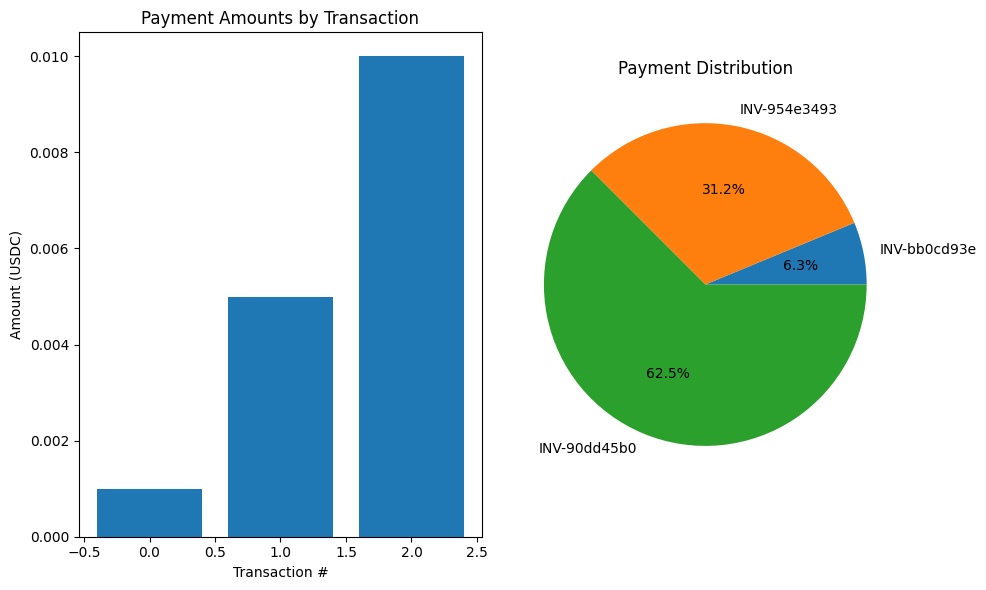


💳 Detailed Payment History:


,timestamp,amount,recipient,tx_hash,status
0,2025-09-28T21:47:00.241239,0.001,0xMerchant456...,6af4aa8aad17ac1b,confirmed
1,2025-09-28T21:47:00.341599,0.005,0xMerchant456...,7a11b6c705c55354,confirmed
2,2025-09-28T21:47:00.441960,0.010,0xMerchant456...,3cffd29e90615dae,confirmed


In [6]:
# Analyze payment patterns
payment_df = agent_client.get_payment_summary()

if not payment_df.empty:
    print("📊 Payment Analytics:")
    print(f"   Total Transactions: {len(payment_df)}")
    print(f"   Total Spent: {payment_df['amount'].sum():.6f} USDC")
    print(f"   Average Transaction: {payment_df['amount'].mean():.6f} USDC")
    print(f"   Time Span: {payment_df['timestamp'].min()} to {payment_df['timestamp'].max()}")

    # Visualize payments
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    plt.bar(range(len(payment_df)), payment_df['amount'])
    plt.title('Payment Amounts by Transaction')
    plt.xlabel('Transaction #')
    plt.ylabel('Amount (USDC)')

    plt.subplot(1, 2, 2)
    plt.pie(payment_df['amount'], labels=payment_df['invoice'], autopct='%1.1f%%')
    plt.title('Payment Distribution')

    plt.tight_layout()
    plt.show()

    # Display payment history
    print("\n💳 Detailed Payment History:")
    display(payment_df[['timestamp', 'amount', 'recipient', 'tx_hash', 'status']])
else:
    print("No payments recorded yet")

## 5. Advanced: Multi-Agent Commerce Simulation

Let's simulate a more complex scenario where multiple AI agents interact in a marketplace, buying and selling services from each other.

In [7]:
class AgentMarketplace:
    """Simulate marketplace where AI agents buy/sell services"""

    def __init__(self):
        self.agents = {}
        self.services = {
            'data_analysis': {'provider': 'DataBot', 'price': 0.002},
            'image_generation': {'provider': 'ArtBot', 'price': 0.005},
            'text_translation': {'provider': 'LangBot', 'price': 0.001},
            'code_review': {'provider': 'CodeBot', 'price': 0.003}
        }
        self.transactions = []

    def register_agent(self, name: str, initial_balance: float = 10.0):
        """Register a new agent in the marketplace"""
        self.agents[name] = {
            'balance': initial_balance,
            'transactions': [],
            'services_used': []
        }
        print(f"🤖 {name} joined marketplace with {initial_balance} USDC")

    def purchase_service(self, buyer: str, service: str) -> bool:
        """Agent purchases a service from another agent"""
        if buyer not in self.agents or service not in self.services:
            return False

        service_info = self.services[service]
        price = service_info['price']
        provider = service_info['provider']

        if self.agents[buyer]['balance'] < price:
            print(f"❌ {buyer} insufficient funds for {service} ({price} USDC)")
            return False

        # Process payment
        self.agents[buyer]['balance'] -= price
        if provider in self.agents:
            self.agents[provider]['balance'] += price * 0.95  # 5% marketplace fee

        # Record transaction
        tx = {
            'timestamp': datetime.now().isoformat(),
            'buyer': buyer,
            'service': service,
            'provider': provider,
            'amount': price,
            'tx_hash': hashlib.sha256(f"{buyer}{service}{time.time()}".encode()).hexdigest()[:16]
        }

        self.transactions.append(tx)
        self.agents[buyer]['transactions'].append(tx)
        self.agents[buyer]['services_used'].append(service)

        print(f"✅ {buyer} purchased {service} from {provider} for {price} USDC")
        return True

    def get_marketplace_stats(self) -> Dict:
        return {
            'total_agents': len(self.agents),
            'total_transactions': len(self.transactions),
            'total_volume': sum(tx['amount'] for tx in self.transactions),
            'avg_transaction': sum(tx['amount'] for tx in self.transactions) / len(self.transactions) if self.transactions else 0
        }

# Initialize marketplace
marketplace = AgentMarketplace()

# Register agents
agents = ['ResearchBot', 'WriterBot', 'AnalystBot', 'CreativeBot']
for agent in agents:
    marketplace.register_agent(agent, 15.0)

# Also register service providers
providers = ['DataBot', 'ArtBot', 'LangBot', 'CodeBot']
for provider in providers:
    marketplace.register_agent(provider, 5.0)

print(f"\n🏪 Marketplace initialized with {len(agents + providers)} agents")

🤖 ResearchBot joined marketplace with 15.0 USDC
🤖 WriterBot joined marketplace with 15.0 USDC
🤖 AnalystBot joined marketplace with 15.0 USDC
🤖 CreativeBot joined marketplace with 15.0 USDC
🤖 DataBot joined marketplace with 5.0 USDC
🤖 ArtBot joined marketplace with 5.0 USDC
🤖 LangBot joined marketplace with 5.0 USDC
🤖 CodeBot joined marketplace with 5.0 USDC

🏪 Marketplace initialized with 8 agents


In [8]:
# Simulate agent interactions
import random

print("\n🎭 Simulating Agent Commerce...\n")

# Random transactions
services = list(marketplace.services.keys())
buyer_agents = ['ResearchBot', 'WriterBot', 'AnalystBot', 'CreativeBot']

for i in range(10):
    buyer = random.choice(buyer_agents)
    service = random.choice(services)
    marketplace.purchase_service(buyer, service)
    time.sleep(0.1)  # Small delay for realism

# Show marketplace statistics
stats = marketplace.get_marketplace_stats()
print(f"\n📈 Marketplace Statistics:")
print(f"   Active Agents: {stats['total_agents']}")
print(f"   Total Transactions: {stats['total_transactions']}")
print(f"   Total Volume: {stats['total_volume']:.6f} USDC")
print(f"   Average Transaction: {stats['avg_transaction']:.6f} USDC")

# Show agent balances
print(f"\n💰 Agent Balances:")
for agent_name, agent_data in marketplace.agents.items():
    balance = agent_data['balance']
    tx_count = len(agent_data['transactions'])
    print(f"   {agent_name}: {balance:.4f} USDC ({tx_count} transactions)")


🎭 Simulating Agent Commerce...

✅ AnalystBot purchased image_generation from ArtBot for 0.005 USDC
✅ AnalystBot purchased data_analysis from DataBot for 0.002 USDC
✅ AnalystBot purchased code_review from CodeBot for 0.003 USDC
✅ ResearchBot purchased text_translation from LangBot for 0.001 USDC
✅ WriterBot purchased data_analysis from DataBot for 0.002 USDC
✅ AnalystBot purchased text_translation from LangBot for 0.001 USDC
✅ ResearchBot purchased data_analysis from DataBot for 0.002 USDC
✅ ResearchBot purchased image_generation from ArtBot for 0.005 USDC
✅ CreativeBot purchased image_generation from ArtBot for 0.005 USDC
✅ AnalystBot purchased data_analysis from DataBot for 0.002 USDC

📈 Marketplace Statistics:
   Active Agents: 8
   Total Transactions: 10
   Total Volume: 0.028000 USDC
   Average Transaction: 0.002800 USDC

💰 Agent Balances:
   ResearchBot: 14.9920 USDC (3 transactions)
   WriterBot: 14.9980 USDC (1 transactions)
   AnalystBot: 14.9870 USDC (5 transactions)
   Creat

## 6. Implementation Roadmap & Best Practices

### Production Implementation Steps:

1. **Protocol Integration**
   - Implement X402 HTTP client library
   - Add payment detection middleware
   - Handle retries and error cases

2. **Web3 Infrastructure**
   - Set up Base/Ethereum RPC endpoints
   - Implement USDC contract interactions
   - Add wallet management and key security

3. **Security Considerations**
   - Secure private key storage (HSM, cloud KMS)
   - Payment amount validation and limits
   - Transaction monitoring and fraud detection
   - Backup payment methods

4. **Monitoring & Analytics**
   - Payment success/failure rates
   - Cost per service utilization
   - Agent behavior analysis
   - Resource usage optimization

### Enterprise Integration Patterns:
- **Gateway Pattern**: Central payment proxy for multiple agents
- **Wallet-as-a-Service**: Managed wallets with spending controls
- **Audit Trail**: Full transaction logging for compliance
- **Rate Limiting**: Prevent runaway agent spending

In [9]:
# Final summary and export
print("\n" + "="*80)
print("SUMMARY: Agentic AI Payments with X402/AP2 Protocol")
print("="*80)

summary_data = {
    'Protocol': 'X402 + Google AP2',
    'Payment Method': 'USDC Stablecoins on Base L2',
    'Transaction Cost': '~$0.001 per payment',
    'Settlement Time': '~2 seconds',
    'Use Cases': ['API Monetization', 'Compute Resources', 'Agent Services', 'Data Access'],
    'Key Benefits': [
        'Autonomous operation without human intervention',
        'Micropayment viability due to low fees',
        'Global accessibility without banking restrictions',
        'Programmable payment logic with smart contracts',
        'Instant settlement and verification'
    ]
}

print(json.dumps(summary_data, indent=2))

print("\n🚀 Next Steps:")
print("1. Integrate with real Base RPC endpoints")
print("2. Implement production wallet security")
print("3. Add comprehensive error handling")
print("4. Build monitoring and analytics dashboard")
print("5. Deploy pilot agent in controlled environment")

print("\n📚 Additional Resources:")
print("- X402 Specification: https://github.com/coinbase/x402")
print("- Base Network Documentation: https://docs.base.org")
print("- Google AP2 Protocol: https://cloud.google.com/blog/products/ai-machine-learning/announcing-agents-to-payments-ap2-protocol")
print("- Web3.py Documentation: https://web3py.readthedocs.io")

print("\n✨ This notebook demonstrates the foundational concepts of autonomous AI payments.")
print("   Ready for production implementation and enterprise deployment!")


SUMMARY: Agentic AI Payments with X402/AP2 Protocol
{
  "Protocol": "X402 + Google AP2",
  "Payment Method": "USDC Stablecoins on Base L2",
  "Transaction Cost": "~$0.001 per payment",
  "Settlement Time": "~2 seconds",
  "Use Cases": [
    "API Monetization",
    "Compute Resources",
    "Agent Services",
    "Data Access"
  ],
  "Key Benefits": [
    "Autonomous operation without human intervention",
    "Micropayment viability due to low fees",
    "Global accessibility without banking restrictions",
    "Programmable payment logic with smart contracts",
    "Instant settlement and verification"
  ]
}

🚀 Next Steps:
1. Integrate with real Base RPC endpoints
2. Implement production wallet security
3. Add comprehensive error handling
4. Build monitoring and analytics dashboard
5. Deploy pilot agent in controlled environment

📚 Additional Resources:
- X402 Specification: https://github.com/coinbase/x402
- Base Network Documentation: https://docs.base.org
- Google AP2 Protocol: https:/